In [99]:
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error , mean_squared_error  , mean_absolute_percentage_error  
from dbn import SupervisedDBNRegression

import tensorflow as tf
from tensorflow.keras.layers import LSTM , Dropout , Dense
from tensorflow.keras.models import Sequential

import pandas as pd 
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('../../data/Equity/NSE50.csv')

In [37]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']

In [38]:
df.drop(df[df['High']==df['Low']].index , axis=0 , inplace=True)

In [39]:
df.head()

,Ticker,Date,Time,Open,High,Low,Close,Volume,OI
Date,,,,,,,,,
1995-11-03,NSE50,1995-11-03,00:00:00,994.0,1001.0,993.0,1000.0,12938015,0
1995-11-06,NSE50,1995-11-06,00:00:00,1002.0,1002.0,989.0,989.0,9711115,0
1995-11-07,NSE50,1995-11-07,00:00:00,987.0,987.0,977.0,978.0,10985070,0
1995-11-08,NSE50,1995-11-08,00:00:00,976.0,976.0,963.0,964.0,7272730,0
1995-11-09,NSE50,1995-11-09,00:00:00,960.0,960.0,952.0,953.0,7680380,0


In [40]:
df.drop(['Ticker' , 'Date' ,'Time', 'Volume' , 'OI '] , axis=1 , inplace=True)

In [41]:
df.head()

,Open,High,Low,Close
Date,,,,
1995-11-03,994.0,1001.0,993.0,1000.0
1995-11-06,1002.0,1002.0,989.0,989.0
1995-11-07,987.0,987.0,977.0,978.0
1995-11-08,976.0,976.0,963.0,964.0
1995-11-09,960.0,960.0,952.0,953.0


In [42]:
data = df.copy()

In [43]:
# Training and testing data
train_size = int(len(data) *0.80)
train = data[:train_size]
test = data[train_size :]

In [44]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(np.array(train['Close']).reshape(-1,1))

In [45]:
scaled_open = scaler.transform(np.array(train['Open']).reshape(-1,1))
scaled_high = scaler.transform(np.array(train['High']).reshape(-1,1))
scaled_low = scaler.transform(np.array(train['Low']).reshape(-1,1))

In [46]:
open_list = []
close_list = []
high_list = []
low_list = []
for i in range(len(scaled_open)):
    open_list.append(scaled_open[i])
    high_list.append(scaled_high[i])
    low_list.append(scaled_low[i])
    close_list.append( scaled_close[i])

In [47]:
open_arr = np.array(open_list).reshape(-1,1)
high_arr = np.array(high_list).reshape(-1,1)
low_arr = np.array(low_list).reshape(-1,1)
close_arr = np.array(close_list).reshape(-1,1)

In [48]:
scaled_data = pd.DataFrame(open_arr , columns=['Open'])

In [49]:
scaled_data['High'] = high_arr
scaled_data['Low'] = low_arr
scaled_data['Close'] = close_arr

In [50]:
scaled_train = np.array(scaled_data)

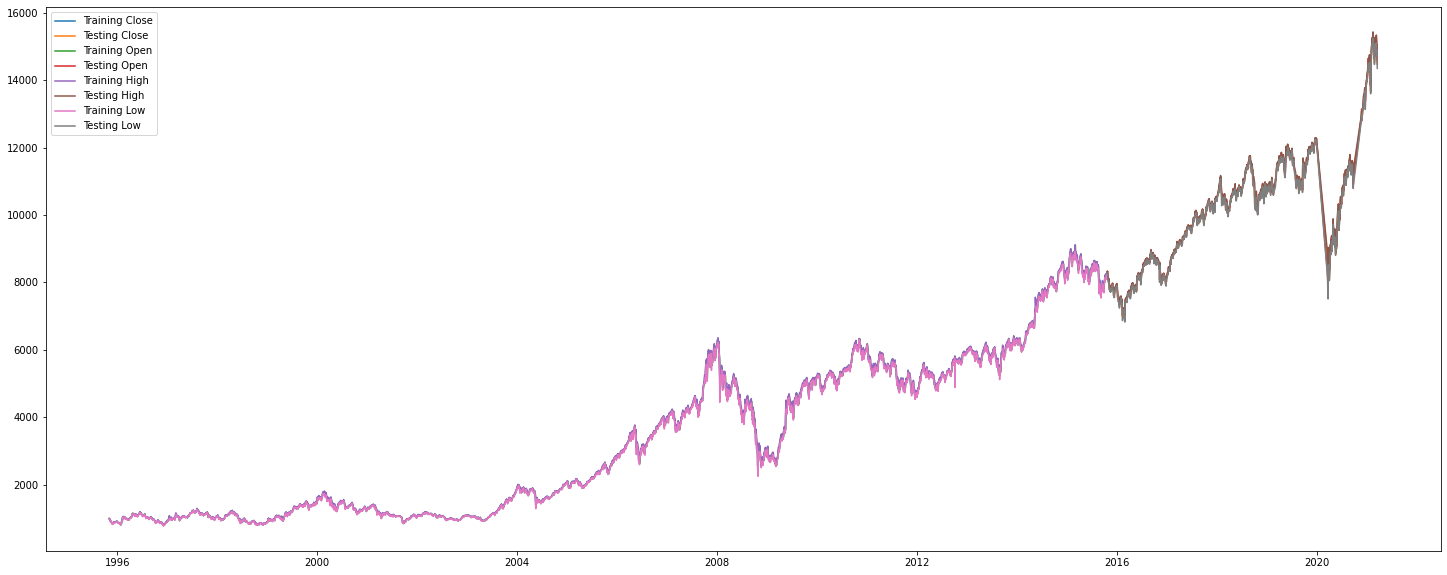

In [104]:
plt.figure(figsize=(25,10))
plt.plot(train['Close'] , label='Training Close')
plt.plot(test['Close'] , label='Testing Close')
plt.plot(train['Open'] , label='Training Open')
plt.plot(test['Open'] , label='Testing Open')
plt.plot(train['High'] , label='Training High')
plt.plot(test['High'] , label='Testing High')
plt.plot(train['Low'] , label='Training Low')
plt.plot(test['Low'] , label='Testing Low')

plt.legend()
plt.show()

In [51]:
X_train = []
y_train = []

for x in range(60,len(scaled_train)-1):
    temp = []
    for i in scaled_train[x-60 :x,]:
        temp.append(i[0] )
        temp.append(i[1])
        temp.append( i[2])
        temp.append(i[3])
        
    X_train.append(temp)
    
    y_train.append(scaled_train[x+1][3])

In [52]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [53]:
X_train[1] , y_train[0]

(array([0.02605353, 0.02605353, 0.02446973, 0.02446973, 0.02422607,
        0.02422607, 0.02300776, 0.02312959, 0.02288593, 0.02288593,
        0.02130213, 0.02142396, 0.02093664, 0.02093664, 0.01996199,
        0.02008382, 0.01996199, 0.01996199, 0.019231  , 0.0195965 ,
        0.0195965 , 0.0195965 , 0.01557608, 0.01569791, 0.01569791,
        0.01569791, 0.01338312, 0.01399228, 0.01374861, 0.01533242,
        0.01374861, 0.01521058, 0.01557608, 0.01557608, 0.01374861,
        0.01411411, 0.01350495, 0.01362678, 0.01179932, 0.01350495,
        0.01313946, 0.01350495, 0.01265214, 0.01277397, 0.01265214,
        0.01265214, 0.01070284, 0.01082467, 0.0109465 , 0.0109465 ,
        0.00838806, 0.00924087, 0.00826622, 0.00826622, 0.00656059,
        0.00753524, 0.00753524, 0.01058101, 0.00753524, 0.01009369,
        0.01021552, 0.01106833, 0.00863172, 0.00887538, 0.00802256,
        0.00802256, 0.00643876, 0.00680425, 0.00692609, 0.00692609,
        0.00424581, 0.00692609, 0.00643876, 0.00

In [64]:
model = SupervisedDBNRegression(hidden_layers_structure=[500],
                                    learning_rate_rbm=0.0001,
                                    learning_rate=0.0001,
                                    n_epochs_rbm=100,
                                    n_iter_backprop=200,
                                    batch_size=32,
                                    activation_function='relu')

In [65]:
model.fit(X_train , y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 34.736814
>> Epoch 2 finished 	RBM Reconstruction error 25.155318
>> Epoch 3 finished 	RBM Reconstruction error 7.764307
>> Epoch 4 finished 	RBM Reconstruction error 0.439504
>> Epoch 5 finished 	RBM Reconstruction error 0.689129
>> Epoch 6 finished 	RBM Reconstruction error 0.806657
>> Epoch 7 finished 	RBM Reconstruction error 0.869992
>> Epoch 8 finished 	RBM Reconstruction error 0.875071
>> Epoch 9 finished 	RBM Reconstruction error 0.896923
>> Epoch 10 finished 	RBM Reconstruction error 0.850995
>> Epoch 11 finished 	RBM Reconstruction error 0.875032
>> Epoch 12 finished 	RBM Reconstruction error 0.919278
>> Epoch 13 finished 	RBM Reconstruction error 0.874491
>> Epoch 14 finished 	RBM Reconstruction error 0.830673
>> Epoch 15 finished 	RBM Reconstruction error 0.877682
>> Epoch 16 finished 	RBM Reconstruction error 0.859274
>> Epoch 17 finished 	RBM Reconstruction error 0.886279
>> Epoch 18 finished 	RBM Re

>> Epoch 53 finished 	ANN training loss 0.001413
>> Epoch 54 finished 	ANN training loss 0.001401
>> Epoch 55 finished 	ANN training loss 0.001388
>> Epoch 56 finished 	ANN training loss 0.001376
>> Epoch 57 finished 	ANN training loss 0.001365
>> Epoch 58 finished 	ANN training loss 0.001353
>> Epoch 59 finished 	ANN training loss 0.001342
>> Epoch 60 finished 	ANN training loss 0.001332
>> Epoch 61 finished 	ANN training loss 0.001321
>> Epoch 62 finished 	ANN training loss 0.001311
>> Epoch 63 finished 	ANN training loss 0.001301
>> Epoch 64 finished 	ANN training loss 0.001291
>> Epoch 65 finished 	ANN training loss 0.001281
>> Epoch 66 finished 	ANN training loss 0.001272
>> Epoch 67 finished 	ANN training loss 0.001263
>> Epoch 68 finished 	ANN training loss 0.001254
>> Epoch 69 finished 	ANN training loss 0.001245
>> Epoch 70 finished 	ANN training loss 0.001237
>> Epoch 71 finished 	ANN training loss 0.001228
>> Epoch 72 finished 	ANN training loss 0.001220
>> Epoch 73 finished

SupervisedDBNRegression()

In [67]:
test_scaled_close = scaler.transform(np.array(test['Close']).reshape(-1,1))
test_scaled_open = scaler.transform(np.array(test['Open']).reshape(-1,1))
test_scaled_high = scaler.transform(np.array(test['High']).reshape(-1,1))
test_scaled_low = scaler.transform(np.array(test['Low']).reshape(-1,1))

In [68]:
open_list = []
close_list = []
high_list = []
low_list = []
for i in range(len(test_scaled_open)):
    open_list.append(test_scaled_open[i])
    high_list.append(test_scaled_high[i])
    low_list.append(test_scaled_low[i])
    close_list.append( test_scaled_close[i])

In [69]:
open_arr = np.array(open_list).reshape(-1,1)
high_arr = np.array(high_list).reshape(-1,1)
low_arr = np.array(low_list).reshape(-1,1)
close_arr = np.array(close_list).reshape(-1,1)

In [70]:
scaled_data = pd.DataFrame(open_arr , columns=['Open'])
scaled_data['High'] = high_arr
scaled_data['Low'] = low_arr
scaled_data['Close'] = close_arr

In [71]:
scaled_test = np.array(scaled_data)

In [31]:
model.save('./models/ohlc25.pkl')

In [72]:
X_test = []
y_test = []

for x in range(60,len(scaled_test)-1):
    temp = []
    for i in scaled_test[x-60 :x,]:
        temp.append(i[0] )
        temp.append(i[1])
        temp.append( i[2])
        temp.append(i[3])
        
    X_test.append(temp)
    
    y_test.append(scaled_test[x+1][3])

In [73]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [74]:
preds = model.predict(X_test)

In [93]:
training_predictions = model.predict(X_train)

In [111]:
print('Mean Squared Error = {}'.format(mean_squared_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) , scaler.inverse_transform(training_predictions))))
print('Mean absolute Error = {}'.format(mean_absolute_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) , scaler.inverse_transform(training_predictions))))

Mean Squared Error = 58450.098482394416
Mean absolute Error = 165.22135913887166


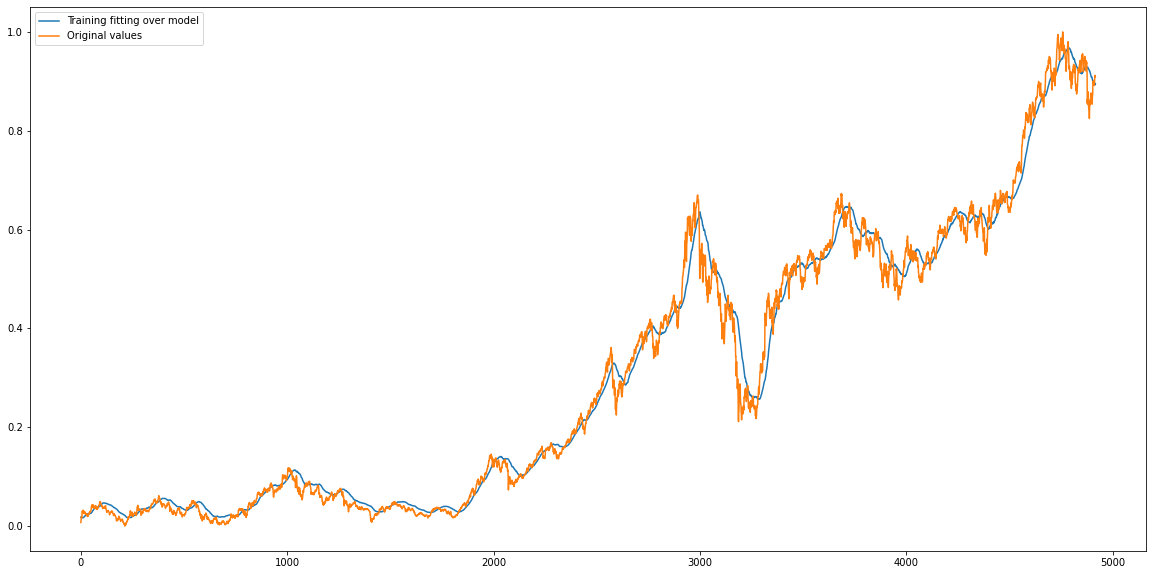

In [94]:
plt.figure(figsize=(20,10))
plt.plot(training_predictions , label='Training fitting over model')
plt.plot(y_train , label = 'Original values')
plt.legend()
plt.show()

In [112]:
print('Mean Squared Error = {}'.format(mean_squared_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) , scaler.inverse_transform(preds))))
print('Mean absolute Error = {}'.format(mean_absolute_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) , scaler.inverse_transform(preds))))

Mean Squared Error = 430787.9082924226
Mean absolute Error = 451.4213606876633


In [118]:
lstm = tf.keras.models.load_model('../LongShortTermMemory/models/lstm240.h5')

In [121]:
lstm_X_test = X_test.reshape((-1,240,1))

In [123]:
lstm_preds = lstm.predict(lstm_X_test)

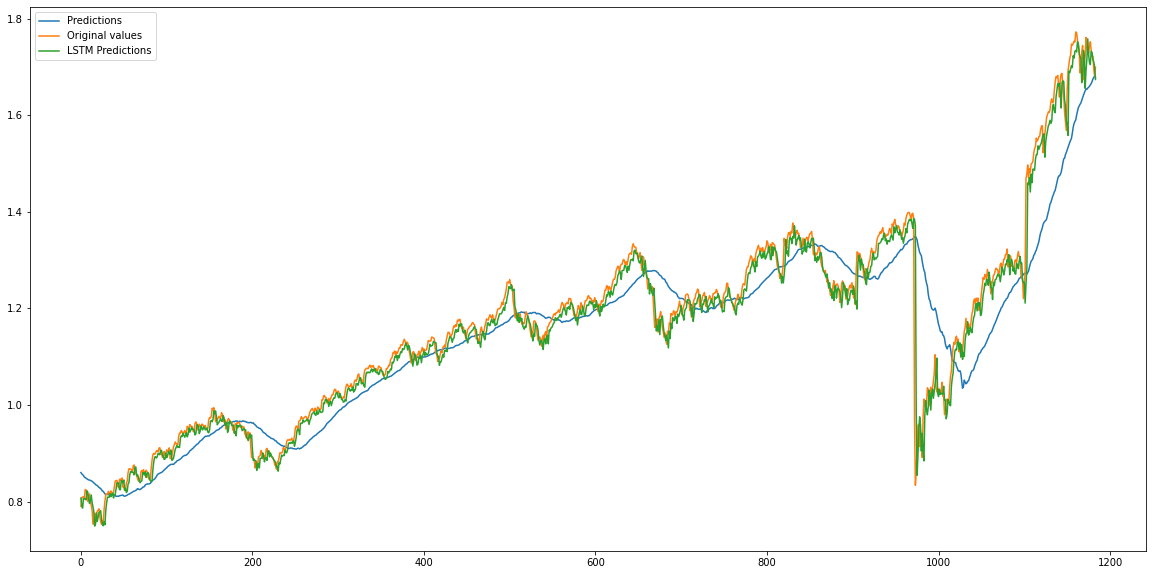

In [125]:
plt.figure(figsize=(20,10))
plt.plot(preds , label='Predictions')
plt.plot(y_test , label = 'Original values')
plt.plot(lstm_preds , label='LSTM Predictions')
plt.legend()
plt.show()

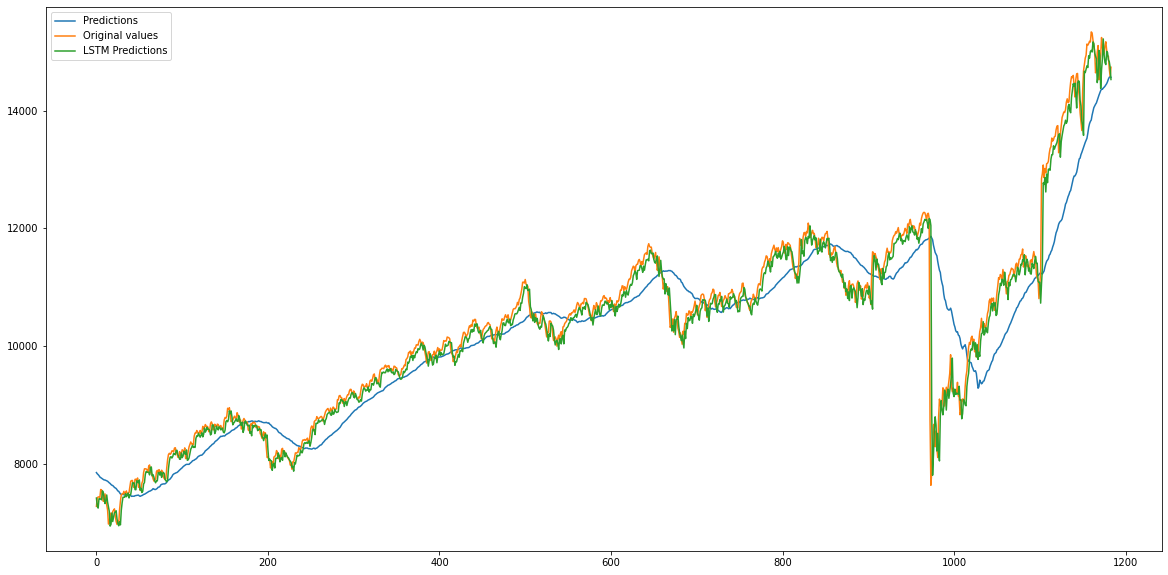

In [127]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(preds) , label='Predictions')
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) , label = 'Original values')
plt.plot(scaler.inverse_transform(lstm_preds) , label='LSTM Predictions')
plt.legend()
plt.show()

In [129]:
print(scaler.inverse_transform(preds)[10])
print(scaler.inverse_transform(lstm_preds)[10])
print(scaler.inverse_transform(np.array(y_test).reshape(-1,1))[10])

[7724.28472188]
[7324.862]
[7489.1001]
